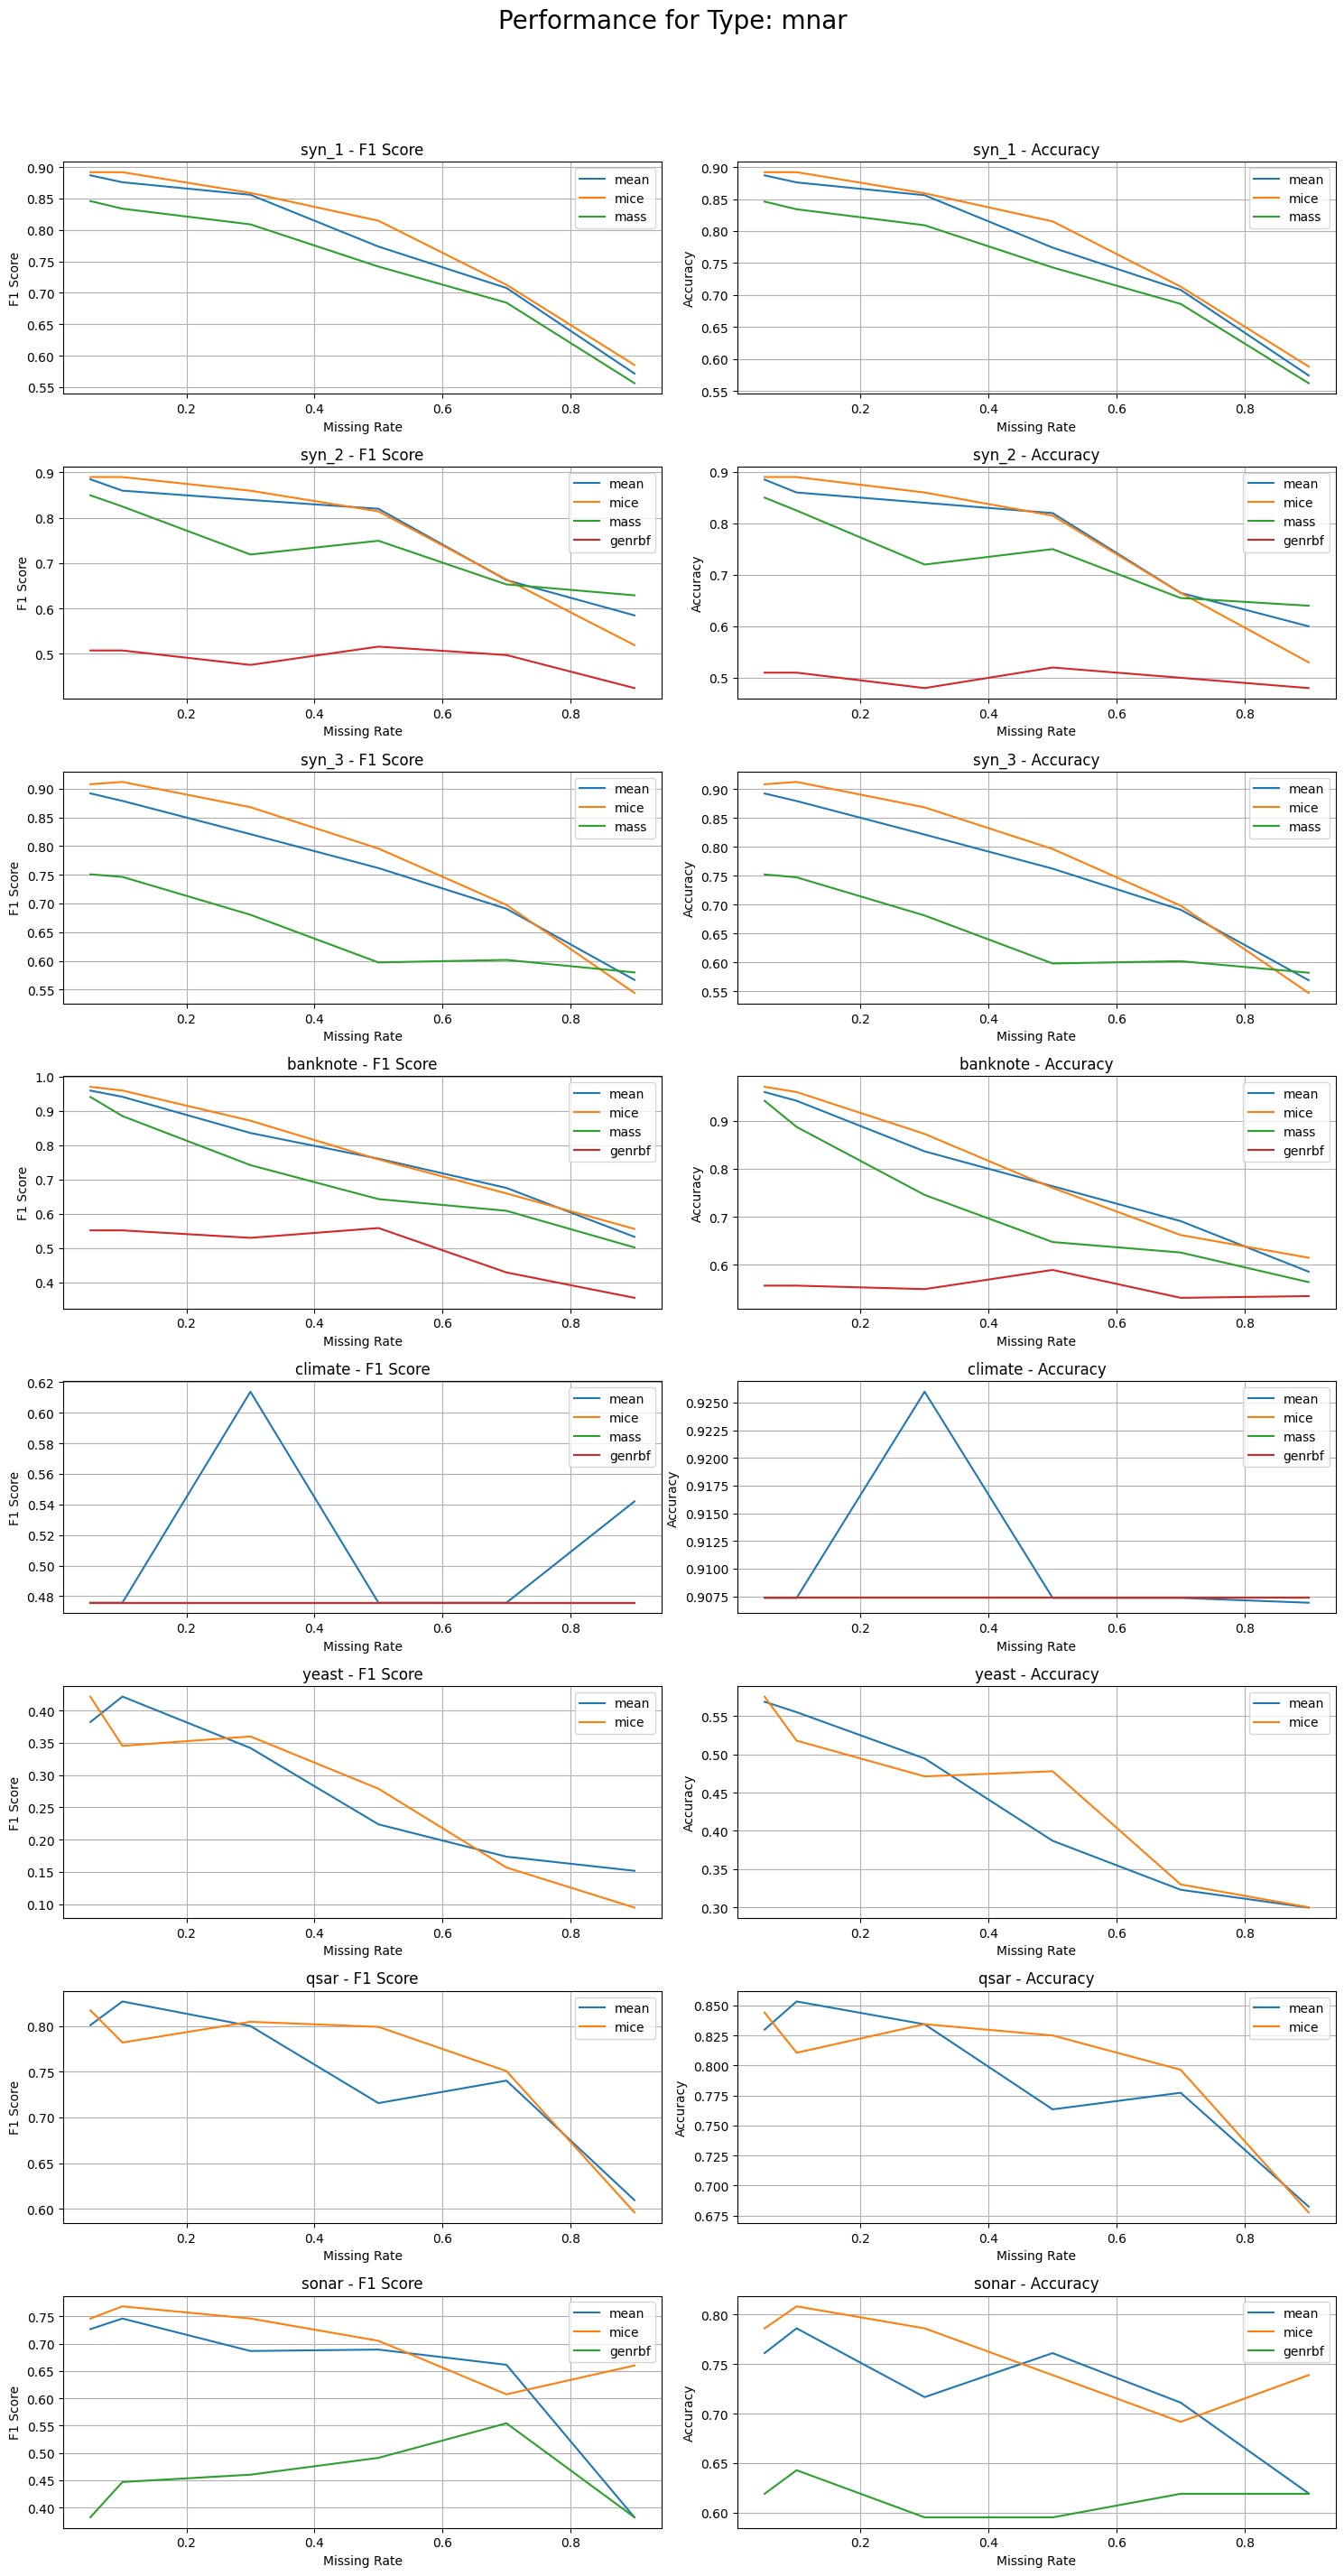

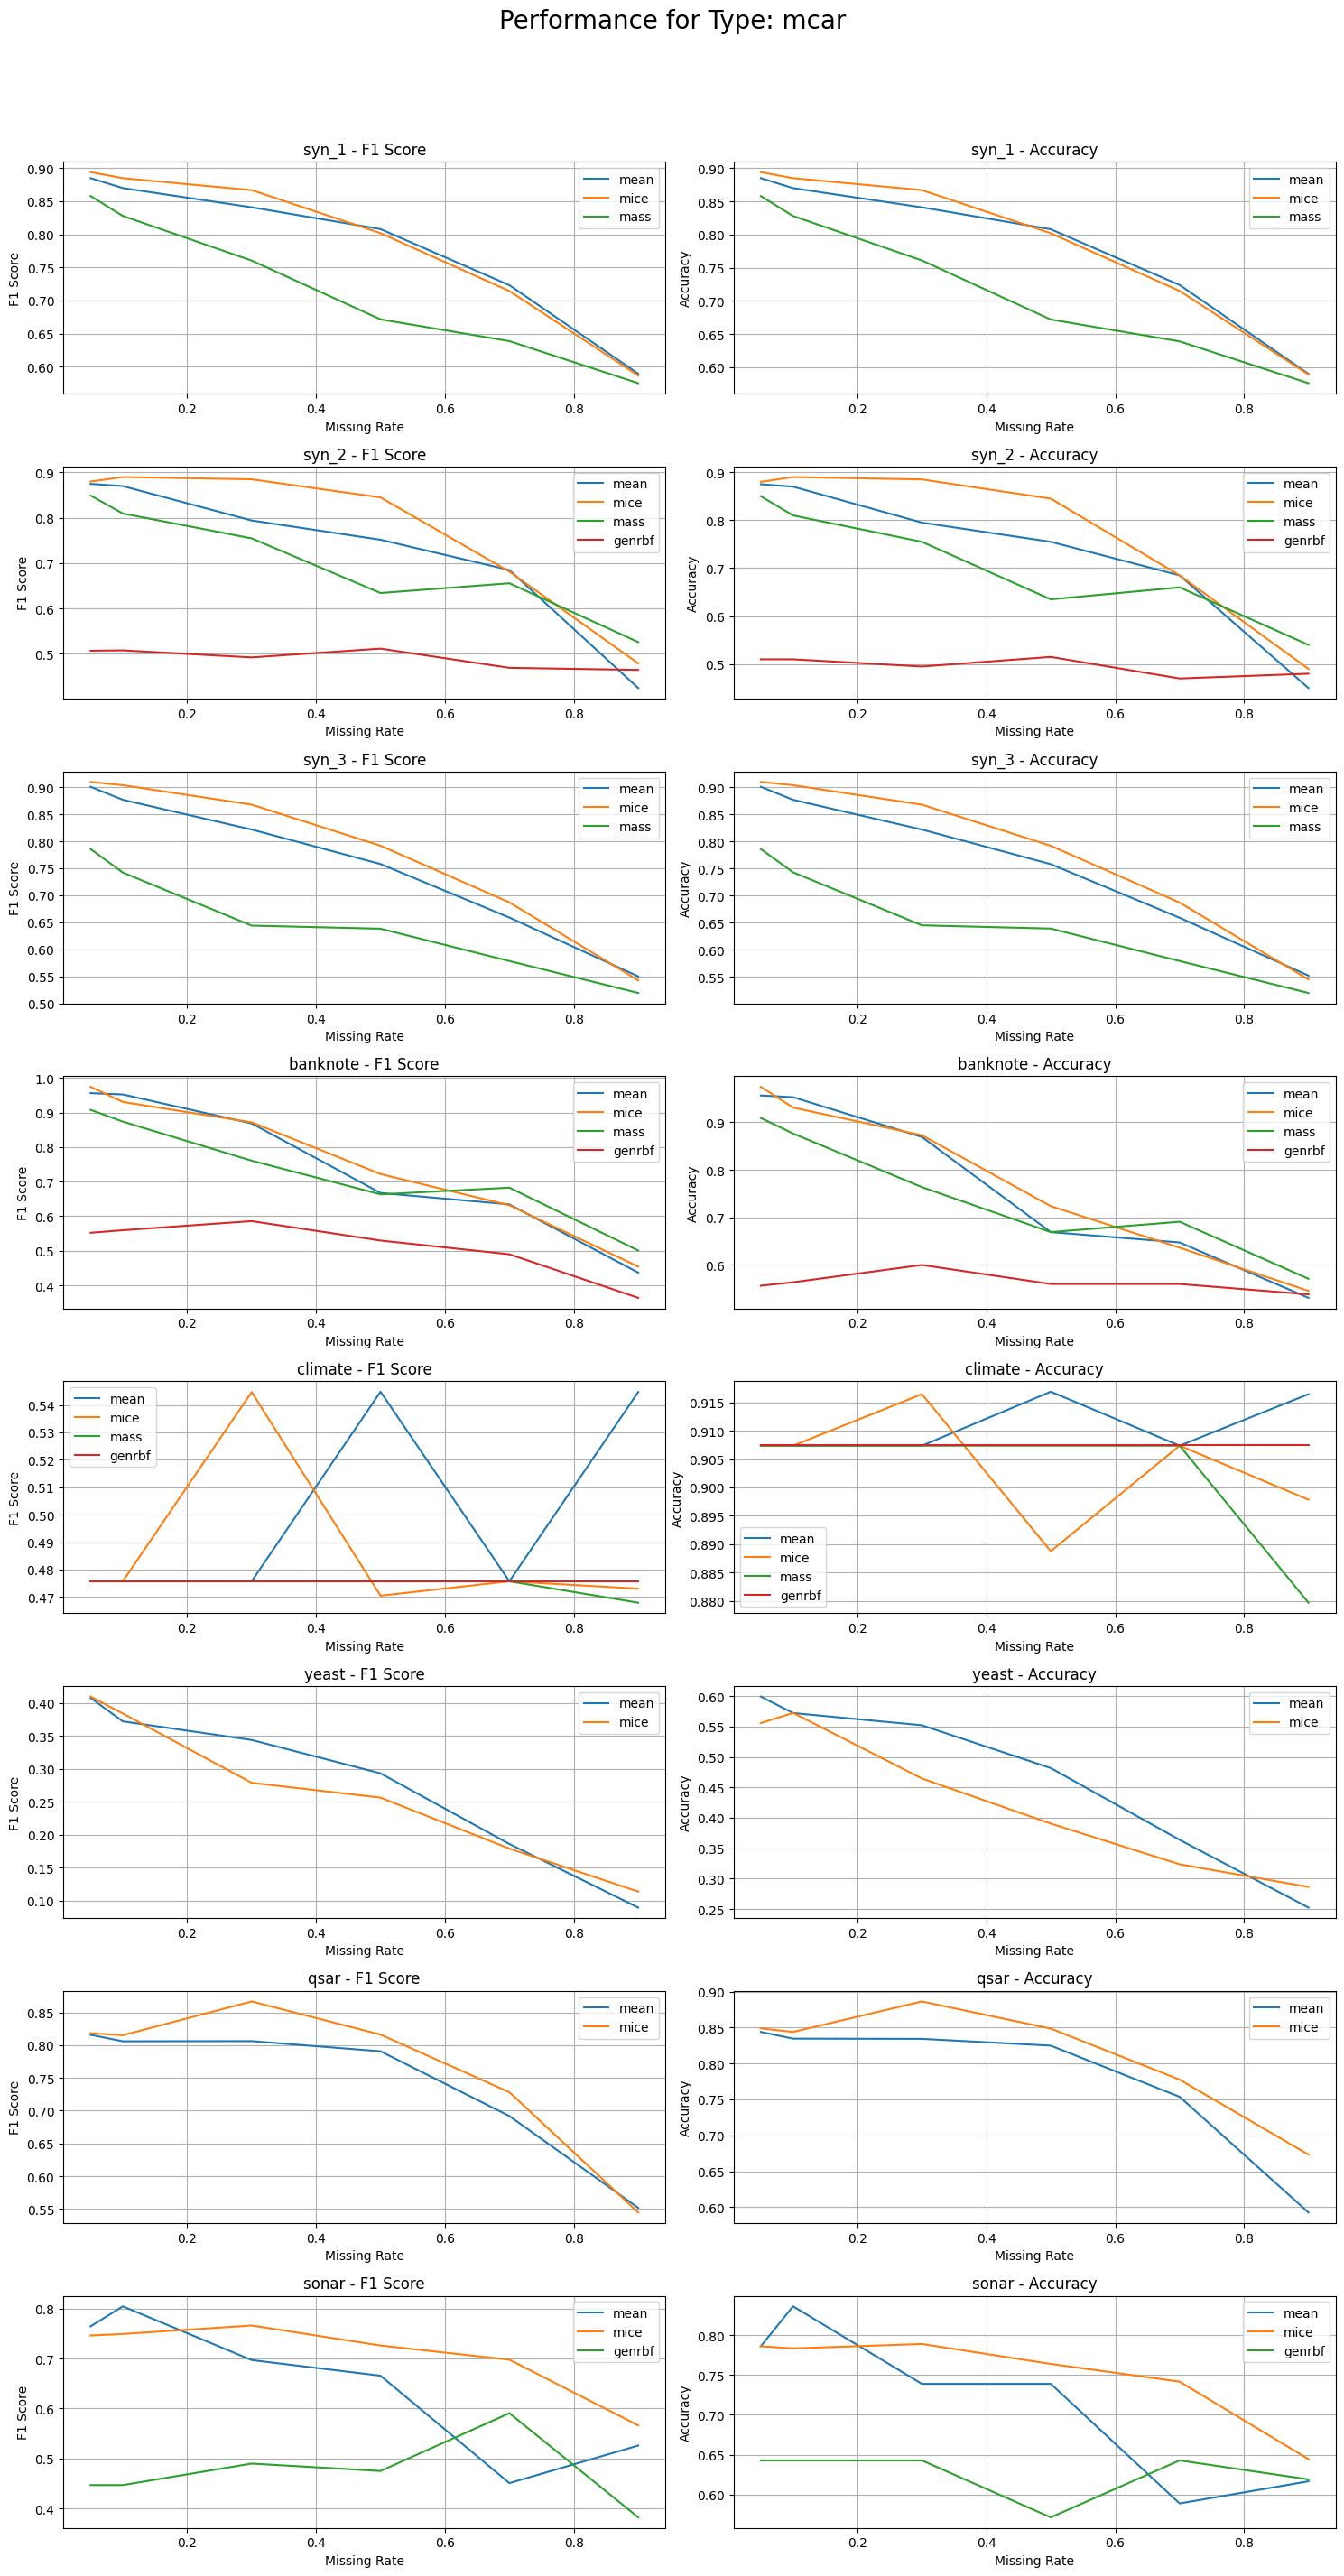

In [4]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Define the folder names and types
datanames = ["syn_1", "syn_2", "syn_3", "banknote", "climate", "yeast", "qsar", "sonar"]
typenames = ['mnar', 'mcar']  # You can add more types if necessary
models = ['mean', 'mice','mass', 'genrbf', ]  # List of models used
missrates = [0.05, 0.1, 0.3, 0.5, 0.7, 0.9]  # Defined missing rates

# Create the plots
for typename in typenames:
    fig, axs = plt.subplots(8, 2, figsize=(15, 30))
    fig.suptitle(f'Performance for Type: {typename}', fontsize=20)
    
    for i, dataname in enumerate(datanames):
        # Prepare subplots for F1 Score and Accuracy
        ax_f1 = axs[i, 0]
        ax_acc = axs[i, 1]
        
        for model in models:
            # Construct the file path
            filepath = f"result/{dataname}/{typename}_{model}.csv"
            if os.path.exists(filepath):
                # Read the CSV file
                df = pd.read_csv(filepath)
                # Plot the data
                ax_f1.plot(missrates, df['F1_Score'], label=f'{model}')
                ax_acc.plot(missrates, df['Accuracy'], label=f'{model}')
        
        # Set titles and labels for F1 Score
        ax_f1.set_title(f'{dataname} - F1 Score')
        ax_f1.set_xlabel('Missing Rate')
        ax_f1.set_ylabel('F1 Score')
        ax_f1.legend()
        ax_f1.grid(True)
        
        # Set titles and labels for Accuracy
        ax_acc.set_title(f'{dataname} - Accuracy')
        ax_acc.set_xlabel('Missing Rate')
        ax_acc.set_ylabel('Accuracy')
        ax_acc.legend()
        ax_acc.grid(True)
    
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.savefig(f'performance_plots_{typename}.png')
    plt.show()